In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from wordcloud import WordCloud, STOPWORDS


In [2]:
df = pd.read_csv('../data_cleaning/cleaned_ba_data.csv', index_col=0)
df.date = pd.to_datetime(df['date'], format='mixed')

In [3]:
df.head()

,reviews,country,date,stars,verified,corpus
0,✅ trip verified | easy check in a t5. galleri...,united kingdom,2023-08-13,8.0,True,easy check gallery south north lounge packed a...
1,"not verified | flight delayed by an hour, it ...",united states,2023-08-12,2.0,False,flight delayed hour happens biggie u change ga...
2,not verified | the staff are very rude and not...,united kingdom,2023-08-11,2.0,False,staff rude trained properly exception made chi...
3,✅ trip verified | good domestic flight operat...,united kingdom,2023-08-08,10.0,True,good domestic flight operated ba cityflyer gro...
4,not verified | failed at all basic travel fund...,canada,2023-08-08,1.0,False,failed basic travel fundamental flight delayed...


In [13]:
# AVERAGE RATING FOR THE AIRLINE
df.stars.mean()

4.762593932646813

Text(0.5, 0.98, 'Total number of reviews with each rating')

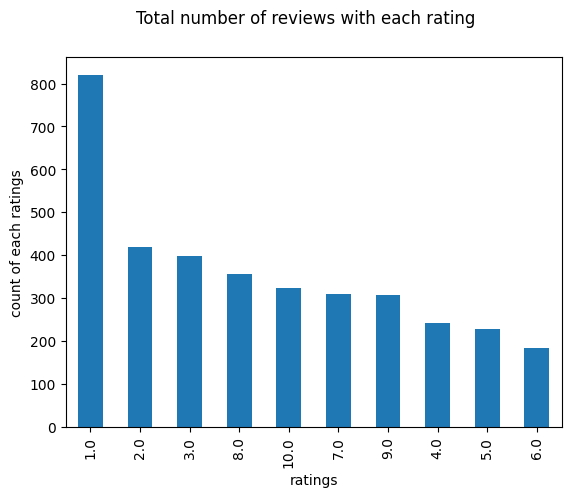

In [27]:
df.stars.value_counts().plot(kind='bar')
plt.xlabel('ratings')
plt.ylabel('count of each ratings')
plt.suptitle('Total number of reviews with each rating')

In [45]:
df_ratings = pd.DataFrame(df.stars.value_counts())
df_ratings = df_ratings.reset_index()

In [54]:
df_ratings

,stars,count
0,1.0,820
1,2.0,420
2,3.0,398
3,8.0,357
4,10.0,324
5,7.0,309
6,9.0,308
7,4.0,243
8,5.0,229
9,6.0,185


In [63]:
#  CONVERT RATINGS TO PERCENTAGE, ROUNDED TO 2 AND MAKE A NEW DATAFRAME
pct_value = (df_ratings['count'].values / df_ratings['count'].sum() *100).tolist()
pct_value = [round(x, 2) for x in pct_value]
df_ratings['pct_values'] = pct_value

In [69]:
df_ratings

,stars,count,pct_values
0,1.0,820,22.82
1,2.0,420,11.69
2,3.0,398,11.08
3,8.0,357,9.94
4,10.0,324,9.02
5,7.0,309,8.60
6,9.0,308,8.57
7,4.0,243,6.76
8,5.0,229,6.37
9,6.0,185,5.15


Text(0.5, 1.0, 'percentage value of ratings')

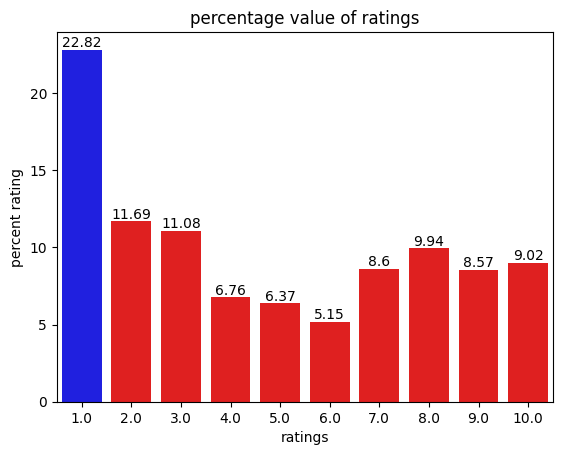

In [85]:
clrs = ['blue' if (x == max(df_ratings.pct_values)) else 'red' for x in df_ratings.pct_values]
ax = sns.barplot(x=df_ratings.stars, y=df_ratings.pct_values, data=df_ratings, palette=clrs, errwidth=0 )

ax.bar_label(ax.containers[0])
ax.set_ylabel('percent rating')
ax.set_xlabel('ratings')
ax.set_title('percentage value of ratings')

In [88]:
print(f"{df.country.nunique()} unique countries")

71 unique countries


In [95]:
df_country = pd.DataFrame(df.country.value_counts()).reset_index()

In [103]:
df_country.head()

,country,count
0,united kingdom,2262
1,united states,394
2,australia,155
3,canada,111
4,germany,60


In [153]:
df_country[df_country['country'] == 'germany']

,country,count
4,germany,60


Text(0.5, 1.0, 'Total number of review per country')

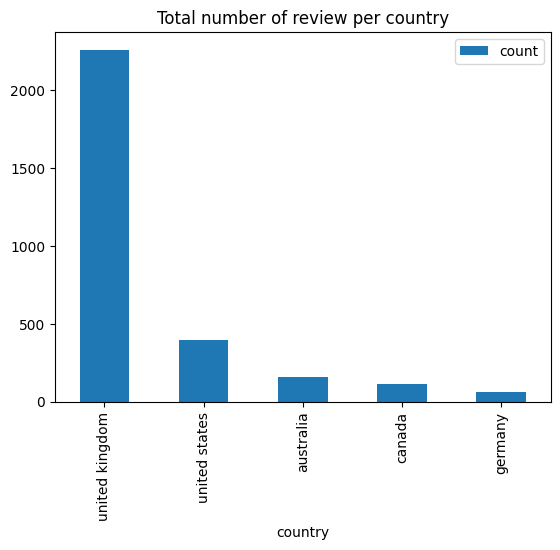

In [111]:
df_country.head().plot(kind='bar', x='country')
plt.title('Total number of review per country')

In [125]:
df_country_rating = df[['country', 'stars']]
df_country_rating = df_country_rating.groupby('country').mean()['stars'].sort_values(ascending=False).reset_index()

In [140]:
#  rename the columns to fit the description
df_country_rating.rename(columns={'stars': 'average_rating'}, inplace=True)

Text(0.5, 1.0, 'Highest average ratings per country')

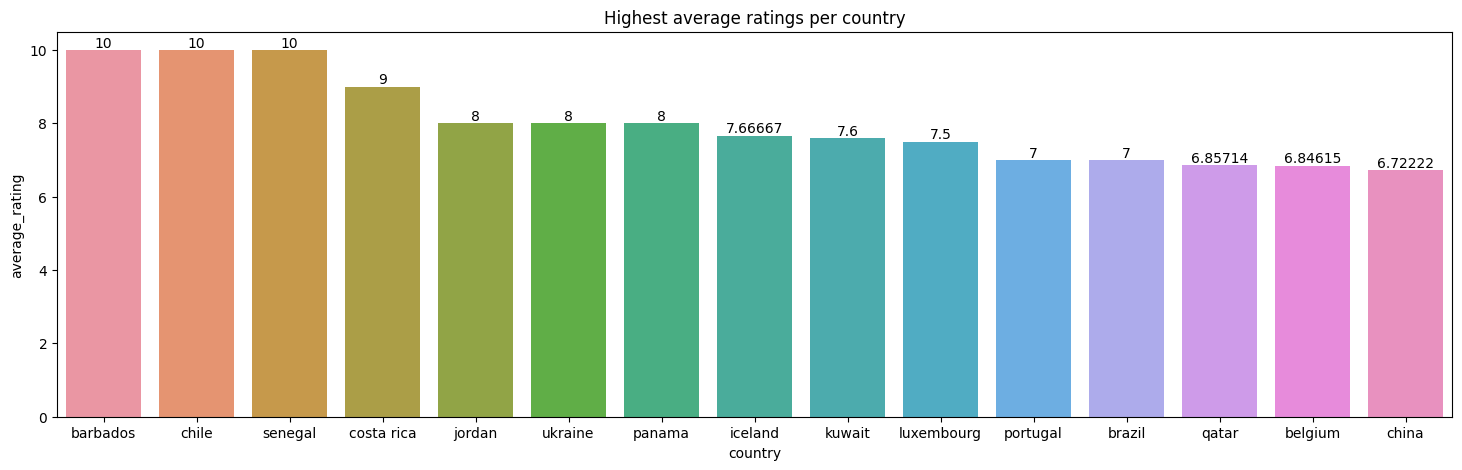

In [142]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(data=df_country_rating[:15],x='country', y='average_rating')
ax.bar_label(ax.containers[0])
ax.set_title('Highest average ratings per country')

In [149]:
df_country_rating1 = df_country_rating.groupby('country').mean()['average_rating'].sort_values(ascending=True).reset_index()

Text(0.5, 1.0, 'Lowest average ratings per country')

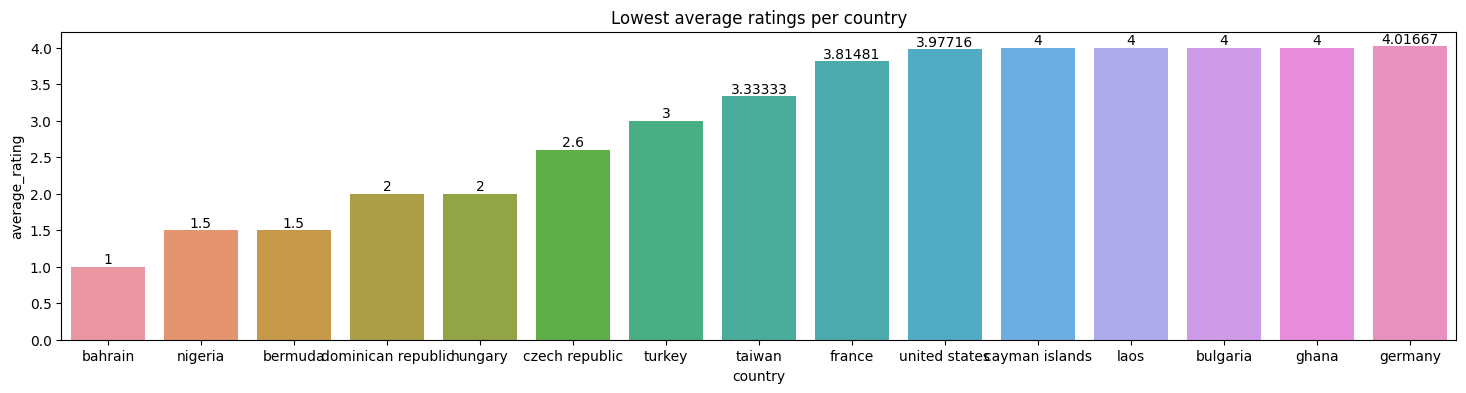

In [151]:
fig, ax = plt.subplots(figsize=(18,4))
ax1 = sns.barplot(data=df_country_rating1[:15],x='country', y='average_rating')
ax.bar_label(ax.containers[0])
ax.set_title('Lowest average ratings per country')

##### Time series analysis

In [4]:
import plotly.express as px

In [7]:
fig = px.line(df, x='date', y='stars')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [8]:
import nltk
import re

from nltk.corpus import stopwords

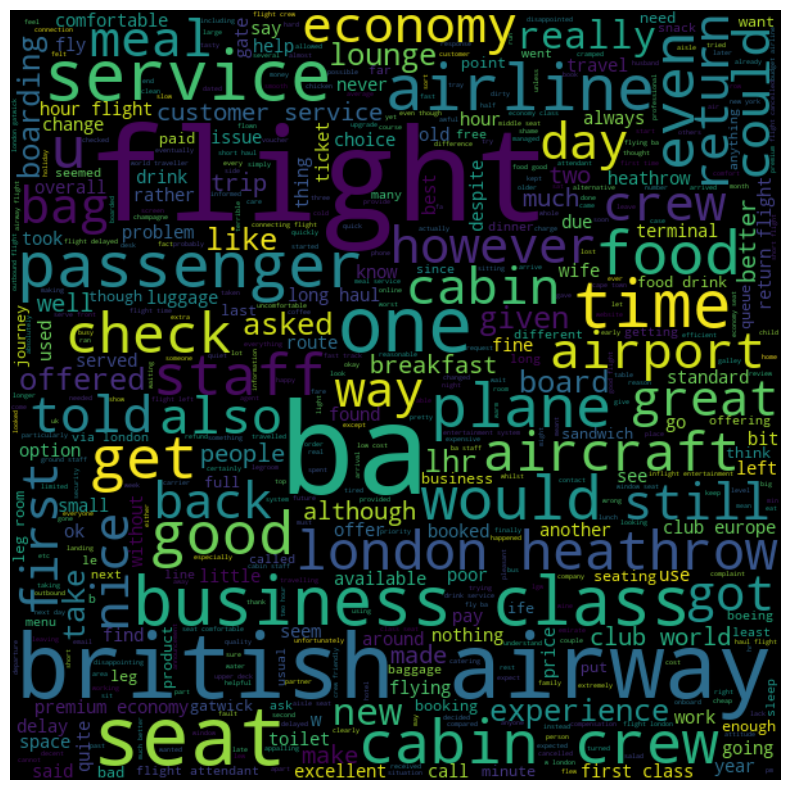

In [13]:
plt.figure(figsize=(20,10))
# combine all the words as a sentence
reviews = " ".join(df.corpus)
stopwords = set(stopwords.words('english'))

# create wordcloud image
wordcloud = WordCloud(height=600, width=600, max_font_size=100, max_words=500,stopwords=stopwords).generate(reviews)

# display the image generated
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

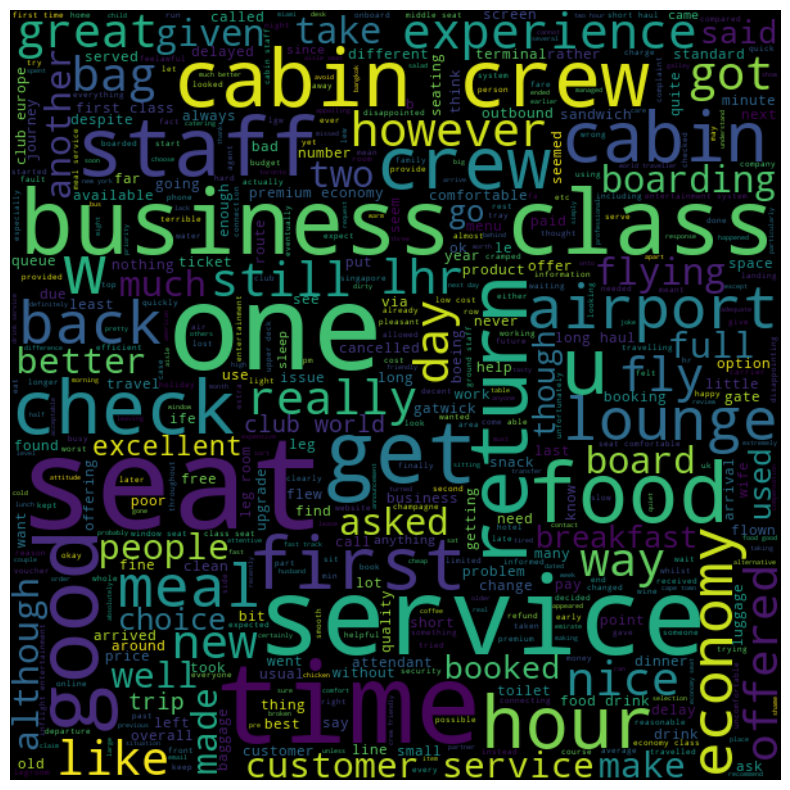

In [16]:
plt.figure(figsize=(20,10))
# combine all the words as a sentence
reviews = " ".join(df.corpus)

# stopwords = set(stopwords.words('english'))
# Update the stopwords to improve wordcloud clarity
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger", "london", "heathrow", "aircraft", "could","even", "would"])


# create wordcloud image
wordcloud = WordCloud(height=600, width=600, max_font_size=100, max_words=500,stopwords=stopwords).generate(reviews)

# display the image generated
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
len(reviews)

2006104